<h2>Load inputs and targets from fer2013.csv</h2>
<h4>Need fer2013.csv on your hard drive (or google drive) </h4>

In [ ]:
# if you are using google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np


names=['emotion','pixels','usage']

# you may need to change this file path
df=pd.read_csv('../fer2013.csv',names=names, na_filter=False)
train_df = df[df['usage']=='Training']
validate_df = df[df['usage']=='PublicTest']
test_df = df[df['usage']=='PrivateTest']

In [ ]:
# from skimage.transform import resize
def load_from_df(df):
    imgs = df['pixels']
    t = df['emotion']
    inputs = []
    targets = []
    for i in imgs.keys():
        x = [int(p) for p in imgs[i].split()]
        x = np.reshape(x,(48,48))
        # resize_x = resize(x, (112, 112), preserve_range=True)
        y = [0 for i in range(7)]
        y[int(t[i])] = 1
        inputs.append(x)
        targets.append(y)
    inputs = np.array(inputs,dtype=np.float32)
    inputs = np.expand_dims(inputs,axis=3)
    inputs /= 255
    targets = np.array(targets, dtype=np.float32)
    return inputs, targets

In [ ]:
v_inputs, v_targets = load_from_df(validate_df)
t_inputs, t_targets = load_from_df(test_df)
tr_inputs, tr_targets = load_from_df(train_df)

###Base model

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

proto = Sequential()

proto.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Flatten())
proto.add(Dense(256,activation='relu'))
proto.add(Dense(512,activation='relu'))
proto.add(Dense(7,activation='softmax'))

proto.summary()

Compile

In [ ]:
proto.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train model

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer = ModelCheckpoint(filepath='mycnn_prototype.hdf5',verbose=1,save_best_only= True)

hist = proto.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

proto_dropout = Sequential()

proto_dropout.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Flatten())
proto_dropout.add(Dense(256,activation='relu'))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Dense(512,activation='relu'))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Dense(7,activation='softmax'))

# proto_dropout.summary()

In [ ]:
proto_dropout.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_dropout = ModelCheckpoint(filepath='mycnn_dropout.hdf5',verbose=1,save_best_only= True)

hist_dropout = proto_dropout.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

proto_batchnorm = Sequential()

proto_batchnorm.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Flatten())
proto_batchnorm.add(Dense(256,activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(Dense(512,activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(Dense(7,activation='softmax'))

# proto_batchnorm.summary()

In [ ]:
proto_batchnorm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_batchnorm = ModelCheckpoint(filepath='mycnn_batchnorm.hdf5',verbose=1,save_best_only= True)

hist_batchnorm = proto_batchnorm.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_batchnorm], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

proto_both = Sequential()

proto_both.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Flatten())
proto_both.add(Dense(256,activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(Dropout(0.2))
proto_both.add(Dense(512,activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(Dropout(0.2))
proto_both.add(Dense(7,activation='softmax'))


In [ ]:
proto_both.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_both = ModelCheckpoint(filepath='mycnn_both.hdf5',verbose=1,save_best_only= True)

hist_both = proto_both.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_both], verbose=1)

In [ ]:
from keras.models import load_model
loaded = load_model("mycnn_prototype.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_dropout.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_batchnorm.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_both.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'], label='base model')
plt.plot(hist_dropout.history['val_loss'], label='with dropout')
plt.plot(hist_batchnorm.history['val_loss'], label='with batch norm')
plt.plot(hist_both.history['val_loss'], label='with both')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist.history['val_accuracy'], label='base model')
plt.plot(hist_dropout.history['val_accuracy'], label='with dropout')
plt.plot(hist_batchnorm.history['val_accuracy'], label='with batch norm')
plt.plot(hist_both.history['val_accuracy'], label='with both')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")


#Test dropout

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout1 = Sequential()

dropout1.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Flatten())
dropout1.add(Dense(256,activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(Dropout(0.1))
dropout1.add(Dense(512,activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(Dropout(0.1))
dropout1.add(Dense(7,activation='softmax'))

In [ ]:
dropout1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout1 = ModelCheckpoint(filepath='dropout1.hdf5',verbose=1,save_best_only= True)

hist_dropout1 = dropout1.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout1], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout2 = Sequential()

dropout2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Flatten())
dropout2.add(Dense(256,activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(Dropout(0.2))
dropout2.add(Dense(512,activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(Dropout(0.2))
dropout2.add(Dense(7,activation='softmax'))


In [ ]:
dropout2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout2 = ModelCheckpoint(filepath='dropout2.hdf5',verbose=1,save_best_only= True)

hist_dropout2 = dropout2.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout2], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout3 = Sequential()

dropout3.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Flatten())
dropout3.add(Dense(256,activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(Dropout(0.3))
dropout3.add(Dense(512,activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(Dropout(0.3))
dropout3.add(Dense(7,activation='softmax'))



In [ ]:
from keras.optimizers import Adam

dropout3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout3 = ModelCheckpoint(filepath='dropout3.hdf5',verbose=1,save_best_only= True)

hist_dropout3 = dropout3.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout3], verbose=1)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout4 = Sequential()

dropout4.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Flatten())
dropout4.add(Dense(256,activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(Dropout(0.4))
dropout4.add(Dense(512,activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(Dropout(0.4))
dropout4.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam

dropout4.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout4 = ModelCheckpoint(filepath='dropout4.hdf5',verbose=1,save_best_only= True)

hist_dropout4 = dropout4.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout4], verbose=1)

In [ ]:
from keras.models import load_model
loaded = load_model("dropout1.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout2.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout3.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout4.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_dropout1.history['val_loss'], label='dropout rate 0.1')
plt.plot(hist_dropout2.history['val_loss'], label='dropout rate 0.2')
plt.plot(hist_dropout3.history['val_loss'], label='dropout rate 0.3')
plt.plot(hist_dropout4.history['val_loss'], label='dropout rate 0.4')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist_dropout1.history['val_accuracy'], label='dropout rate 0.1')
plt.plot(hist_dropout2.history['val_accuracy'], label='dropout rate 0.2')
plt.plot(hist_dropout3.history['val_accuracy'], label='dropout rate 0.3')
plt.plot(hist_dropout4.history['val_accuracy'], label='dropout rate 0.4')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropoutf = Sequential()

dropoutf.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Flatten())
dropoutf.add(Dense(256,activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(Dropout(0.35))
dropoutf.add(Dense(512,activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(Dropout(0.35))
dropoutf.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam

dropoutf.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropoutf = ModelCheckpoint(filepath='dropoutf.hdf5',verbose=1,save_best_only= True)

hist_dropoutf = dropoutf.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropoutf], verbose=1)

In [ ]:
loaded = load_model("dropoutf.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

#Test kernel number and neuron number



In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Conv2D(filters=256,kernel_size=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(7,activation='softmax'))
# model.summary()

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_double_layer = ModelCheckpoint(filepath='double_layer.hdf5',verbose=1,save_best_only= True)

hist_double_layer = model.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_double_layer], verbose=1)

In [ ]:
loaded = load_model("double_layer.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m1 = Sequential()
model_m1.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Flatten())
model_m1.add(Dense(256,activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(Dropout(0.35))
model_m1.add(Dense(512,activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(Dropout(0.35))
model_m1.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model_m1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m1 = ModelCheckpoint(filepath='m1.hdf5',verbose=1,save_best_only= True)

hist_m1 = model_m1.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m1], verbose=1)

In [ ]:
loaded = load_model("m1.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m2 = Sequential()

model_m2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Flatten())
model_m2.add(Dense(256,activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Dropout(0.35))
model_m2.add(Dense(512,activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Dropout(0.35))
model_m2.add(Dense(7,activation='softmax'))
model_m2.summary()

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model_m2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m2 = ModelCheckpoint(filepath='m2.hdf5',verbose=1,save_best_only= True)

hist_m2 = model_m2.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m2], verbose=1)

In [ ]:
loaded = load_model("m2.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m3 = Sequential()

model_m3.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Flatten())
model_m3.add(Dense(256,activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Dropout(0.35))
model_m3.add(Dense(512,activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Dropout(0.35))
model_m3.add(Dense(7,activation='softmax'))
model_m3.summary()

In [ ]:
model_m3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m3 = ModelCheckpoint(filepath='m3.hdf5',verbose=1,save_best_only= True)

hist_m3 = model_m3.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m3], verbose=1)

In [ ]:
from keras.models import load_model
loaded = load_model("../models/m3.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_dropoutf.history['val_loss'][:50], label='FER-CNN6 Kernel Size (2,2)')
plt.plot(hist_m1.history['val_loss'], label='FER-CNN6 Kernel Size (3,3)')
plt.plot(hist_m2.history['val_loss'], label='FER-CNN9 Kernel Size (2,2)')
plt.plot(hist_m3.history['val_loss'], label='FER-CNN9 Kernel Size (3,3)')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist_dropoutf.history['val_accuracy'][:50], label='FER-CNN6 Kernel Size (2,2)')
plt.plot(hist_m1.history['val_accuracy'], label='FER-CNN6 Kernel Size (3,3)')
plt.plot(hist_m2.history['val_accuracy'], label='FER-CNN9 Kernel Size (2,2)')
plt.plot(hist_m3.history['val_accuracy'], label='FER-CNN9 Kernel Size (3,3)')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.show()

## Test number of filters and number of neurons

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m4 = Sequential()
model_m4.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Flatten())
model_m4.add(Dense(512,activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(Dropout(0.35))
model_m4.add(Dense(1024,activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(Dropout(0.35))
model_m4.add(Dense(7,activation='softmax'))

In [ ]:
model_m4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m4 = ModelCheckpoint(filepath='m4.hdf5',verbose=1,save_best_only= True)

hist_m4 = model_m4.fit(tr_inputs, tr_targets , 
          validation_data=(t_inputs , t_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m4], verbose=1)

In [ ]:
loaded = load_model("m4.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m5 = Sequential()

model_m5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Flatten())
model_m5.add(Dense(512,activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Dropout(0.35))
model_m5.add(Dense(1024,activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Dropout(0.35))
model_m5.add(Dense(7,activation='softmax'))

In [ ]:
model_m5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_m5.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m5 = ModelCheckpoint(filepath='m5.hdf5',verbose=1,save_best_only= True)

hist_m5 = model_m5.fit(tr_inputs, tr_targets , 
          validation_data=(t_inputs , t_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m5], verbose=1)

In [ ]:
loaded = load_model("m5.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

#Do something with the best model.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from sklearn import metrics
import pandas as pd
import seaborn
loaded = load_model("m3.hdf5")
res = loaded.predict(t_inputs)
emotion_dict = {0: 'Angry', 1:'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
y_true = []
for t in t_targets:
  y_true.append(emotion_dict[np.argmax(t)])
y_pred = []
for t in res:
  ind = np.argmax(t)
  y_pred.append(emotion_dict[ind])
cm = metrics.confusion_matrix(y_true, y_pred)
cm.dtype = np.float64
for i in range(len(cm)):
  s = np.sum(cm[i])
  cm[i] = cm[i] / s
df_cm = pd.DataFrame(cm, index=label, columns=label)
seaborn.heatmap(df_cm, annot=True, cmap='coolwarm')
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()
# metrics.classification_report

## Run on User Inputs

In [1]:
from keras.models import load_model
loaded = load_model("../models/m3.hdf5")


In [2]:
from PIL import Image
import numpy as np

# load, chop, and reshape the image
def get_image(image_path):
    
    image = Image.open(image_path)

    # Remove most pixels that aren't part of a face
    face_width = face_height = 500
    j = (image.size[0] - face_width) // 2
    i = (image.size[1] - face_height) // 2
    image = image.crop([j, i, j + face_width, i + face_height])
    image = image.resize([48, 48], Image.BILINEAR)

    return np.array(image.convert('L'))

In [3]:
import matplotlib.pyplot as plt

emotion_dict = {0: 'Angry', 1:'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

# predict the image to a category
def predict_image(image_path):
    img = get_image(path)
    plt.imshow(img, cmap='gray')
    plt.show()
    
    img_input = np.expand_dims(img,axis=2)
    img_input = np.expand_dims(img_input, axis=0)
    img_input = np.array(img_input,dtype=np.float32)
    img_input /= 255
    
    res = np.argmax(loaded.predict(img_input), axis=-1)
#     print(loaded.predict(img_input))
    print(emotion_dict[res[0]])
    print()
    print()

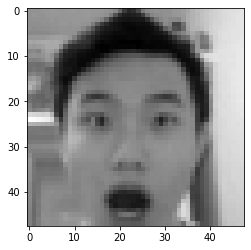

Surprise




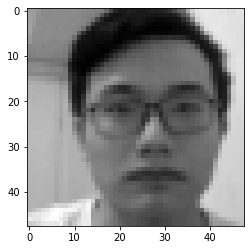

Neutral




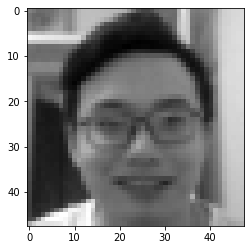

Happy




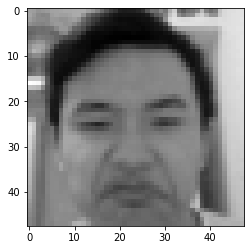

Disgust




In [4]:
path = "rex_surprise.jpg"
predict_image(path)

path = "rex_neutral.jpg"
predict_image(path)

path = "rex_happy.jpg"
predict_image(path)

path = "rex_disgust.jpg"
predict_image(path)